In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [2]:
#Reading the dataset
dataset = pd.read_csv("ecommercesales.csv")

In [3]:
#Show first 15 data rows

dataset.head(15)

,Facebook,Twiiter,Google,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


## Data Pre-Processing

In [4]:
## How many rows an columns have the dataset?

dataset.shape

(200, 4)

1. Checking for missing values

In [5]:
dataset.isna().sum()

Facebook    0
Twiiter     0
Google      0
Sales       0
dtype: int64

### There are no missing values...

In [7]:
## 2. Checking for duplicate rows

dataset.duplicated().any()

False

## There are no duplicates

### Conclusion: There are no duplicate rows present in the dataset

# 3. Checking for outliers

C:\Users\pabli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


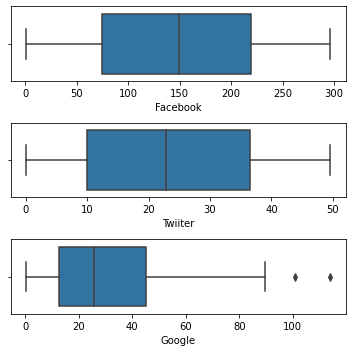

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['Facebook'], ax = axs[0])
plt2 = sns.boxplot(dataset['Twiiter'], ax = axs[1])
plt3 = sns.boxplot(dataset['Google'], ax = axs[2])
plt.tight_layout()

In [ ]:
#Conclusion: There are not that extreme values present in the dataset

## Exploratory Data Analysis
### 1. Distribution of the target variable

C:\Users\pabli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


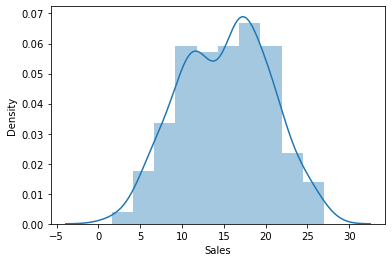

In [10]:
sns.distplot(dataset['Sales']);